Decision Trees Algorithms
Pre-work

Read this blog: https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees which shows some of the issues with decision trees
Choose a dataset from a source in Assignment #1, or another dataset of your choice.
Assignment work

Based on the latest topics presented, choose a dataset of your choice and create a Decision Tree where you can solve a classification problem and predict the outcome of a particular feature or detail of the data used.
Switch variables* to generate 2 decision trees and compare the results. Create a random forest and analyze the results.
Based on real cases where desicion trees went wrong, and 'the bad & ugly' aspects of decision trees (https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees), how can you change this perception when using the decision tree you created to solve a real problem?
Deliverable

Essay (minimum 500 word document)
Write a short essay explaining your analysis, and how you would address the concerns in the blog (listed in pre-work)
Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document)


* Note:
1. We are trying to train 2 different decision trees to compare bias and variance - so swicth the features used for the first node (split) to force a different decision tree (How did the performance change?)
2. You will create 3 models: 2 x decision trees (to compare variance) and a random forest

In [50]:
# Importing the libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [51]:
# Load the data, sourced from here: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset/data

# Download latest version using Kagglehub
path = kagglehub.dataset_download("gabrielsantello/cars-purchase-decision-dataset")

# Load the data
data = pd.read_csv(path + "/car_data.csv")

In [52]:
# Data Preparation
# Check for missing values data types
data.isnull().sum()

# Check data types
data.info()

# Drop the ID column
data.drop('User ID', axis=1, inplace=True)

# Rename the columns
data.columns = ["gender", "age", "salary", "purchased"]

# First few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


,gender,age,salary,purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


The dataset is  pretty simple one with 3 features and one target variable. The features are gender, age, and salary, and the target variable is the decision to purchase a car. The dataset has no missing values and is ready for analysis.

In [53]:
# Exploratory Data Analysis
# Summary statistics
# Histograms/Density plots for age and salary
# Box plot for age and salary
# Bar plot for gender and decision
# Correlation heatmap

In [54]:
# Summary statistics
data.describe()

,age,salary,purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


The average age is 40.1 years, with a standard deviation of 10.7 years, indicating a moderate age variance among individuals. The youngest person in the dataset is 18 years old, while the oldest is 63 years old. 25% of the individuals are aged 32 years or below, 50% are 40 years old (median), and 75% are aged 48 years or below. Regarding annual salary, the average is $72,689, with a notable standard deviation of $34,488, reflecting significant variability. Salaries range from $15,000 to $152,500, with 25% earning $46,375 or less, 50% earning $72,000, and 75% earning $90,000 or less. For the purchased status, 40.2% of the individuals have made a purchase, with the majority (60%) not making a purchase. This binary indicator helps in understanding the purchasing behavior within the dataset.

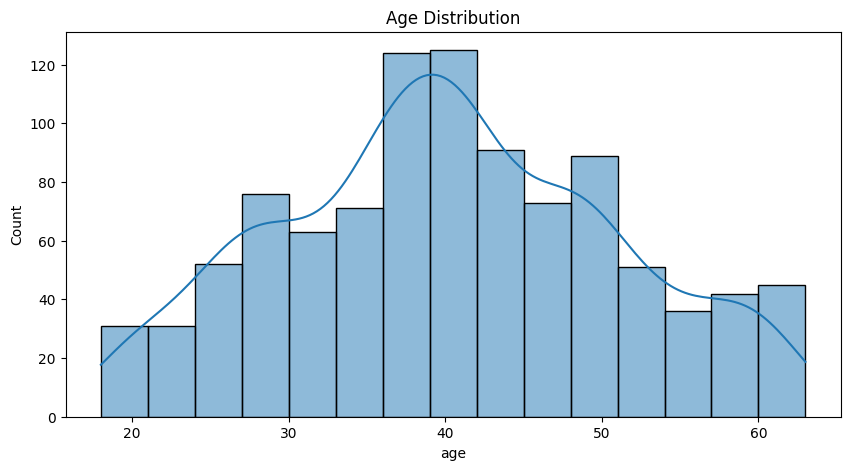

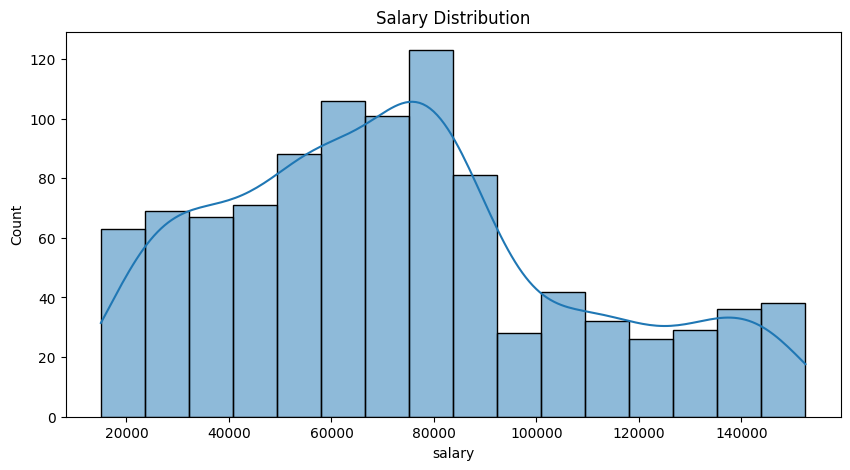

In [55]:
# Histograms/Density plots for age and salary
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

The age distribution is very normally distributed with the peak at around 40 years. This is the same as the mean age observed above, indicating a symmetrical distribution.
The salary distribution is left-skewed, with the peak at around $80,000 but the majority of salaries are less than that. This indicates that there are a minority of high earners disproportionately affecting the mean salary.

<Axes: ylabel='salary'>

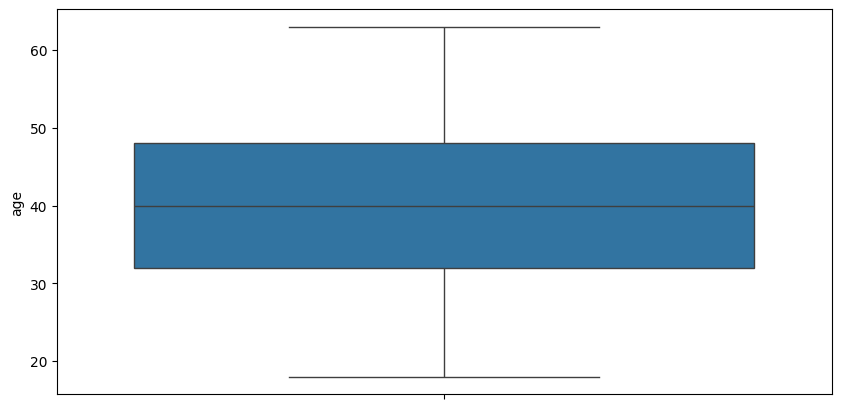

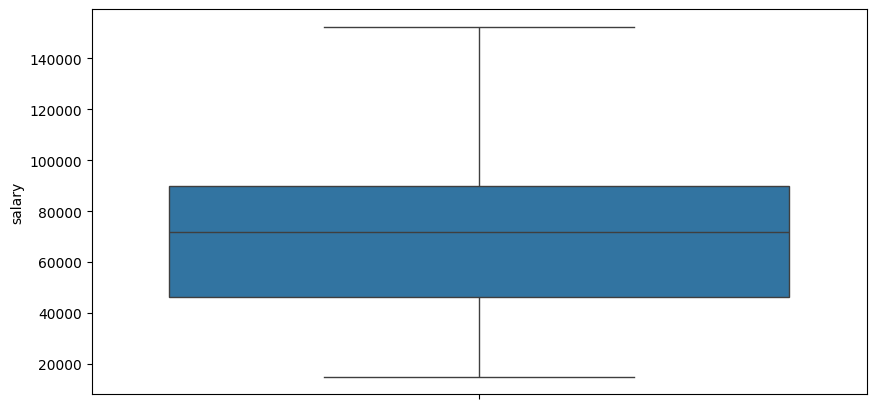

In [56]:
# Box plot for age and salary
plt.figure(figsize=(10, 5))
sns.boxplot(data['age'])

plt.figure(figsize=(10, 5))
sns.boxplot(data['salary'])

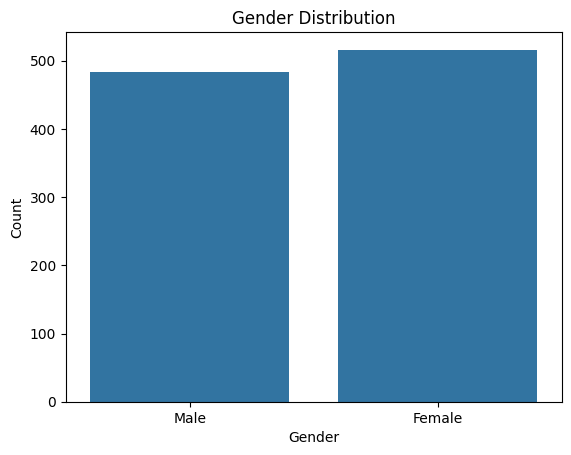

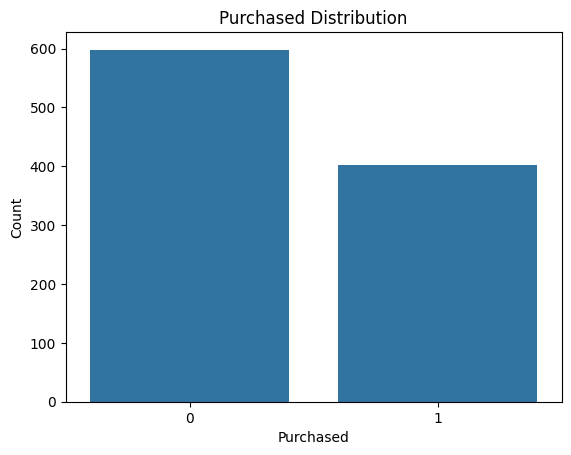

In [57]:
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

sns.countplot(data=data, x='purchased')
plt.title('Purchased Distribution')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()


The dataset contains slightly more females than males but is still relatively balanced. The target variable is a little imbalanced, with more individuals not making a purchase than those who do. This is important to note as it may affect the model's performance, especially since the minority class is of interest.

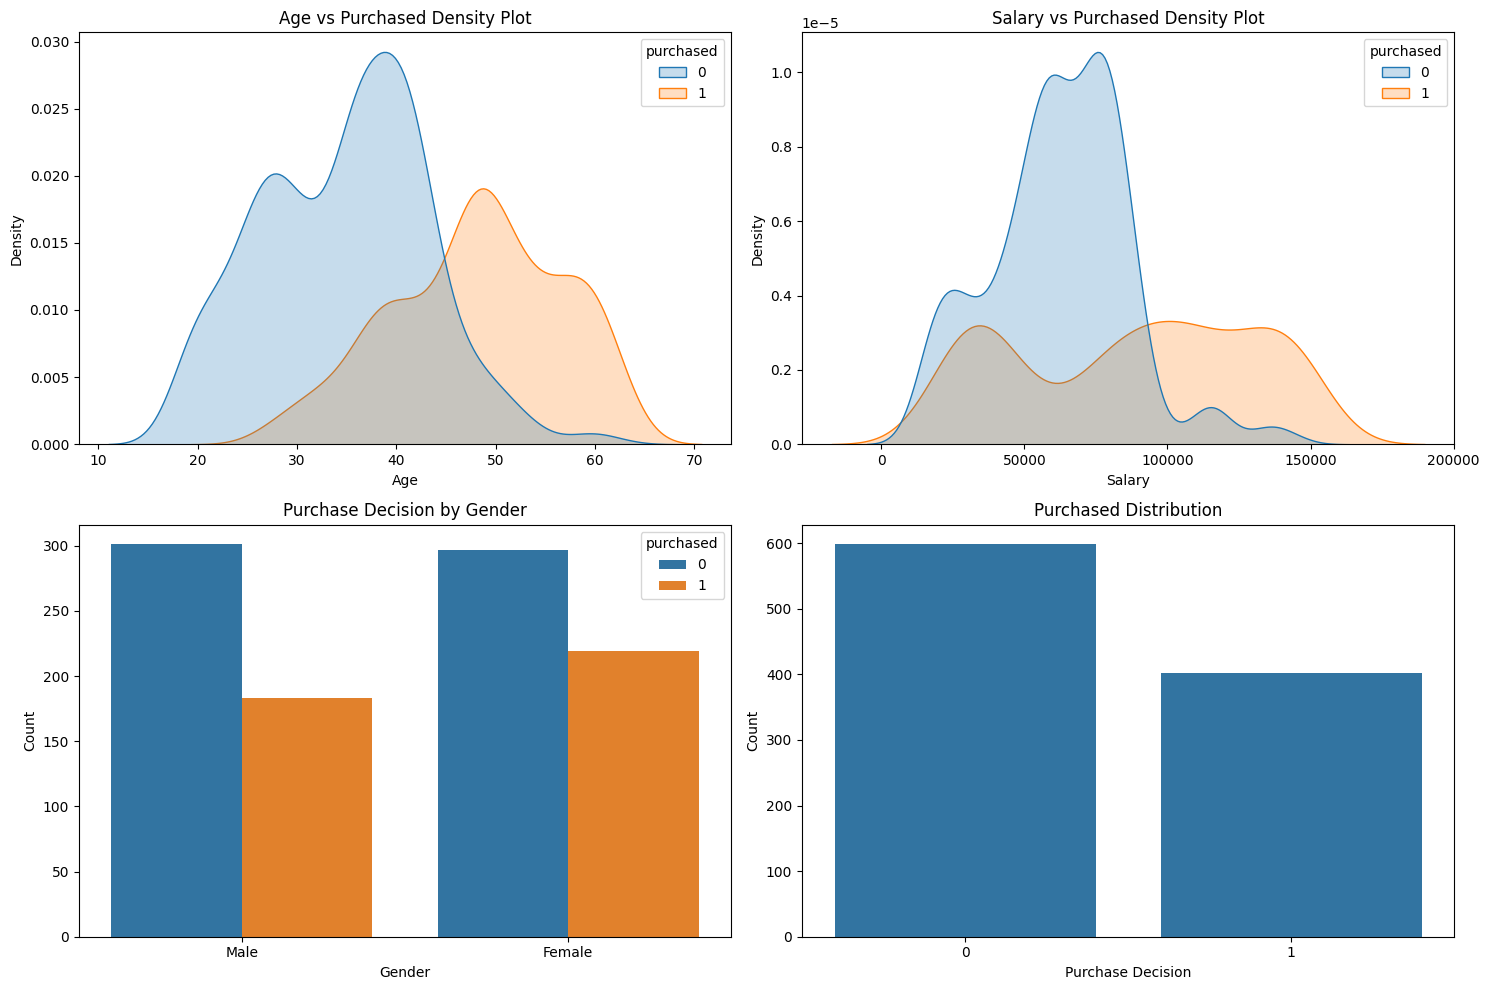

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Age vs Purchased Density Plot
sns.kdeplot(data=data, x='age', hue='purchased', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Purchased Density Plot')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')

# Salary vs Purchased Density Plot
sns.kdeplot(data=data, x='salary', hue='purchased', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Salary vs Purchased Density Plot')
axes[0, 1].set_xlabel('Salary')
axes[0, 1].set_ylabel('Density')

# Purchase Decision by Gender
sns.countplot(data=data, x='gender', hue='purchased', ax=axes[1, 0])
axes[1, 0].set_title('Purchase Decision by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Gender Distribution
sns.countplot(data=data, x='purchased', ax=axes[1, 1])
axes[1, 1].set_title('Purchased Distribution')
axes[1, 1].set_xlabel('Purchase Decision')
axes[1, 1].set_ylabel('Count')


plt.tight_layout()
plt.show()


The distributions of the age and salary variables clearly change when considering the purchase decision. For age, we see younger people are less likely to buy cars. For salary, we see that almost everyone in the dataset above $100,000 has purchased a car. This indicates that these two variables are important in predicting the purchase.

In [59]:
# Feature Engineering
# Encoding categorical variables
# Creating new binary variables; above average salary and above average age

In [60]:
# Convert gender to numerical 0s and 1s
data['male'] = data['gender'].map({'Male': 1, 'Female': 0})

# Drop the gender column
data.drop('gender', axis=1, inplace=True)

In [61]:
# Create binary variables for above average salary and age
#data['above_avg_salary'] = data['salary'] > data['salary'].mean()
#data['above_avg_age'] = data['age'] > data['age'].mean()

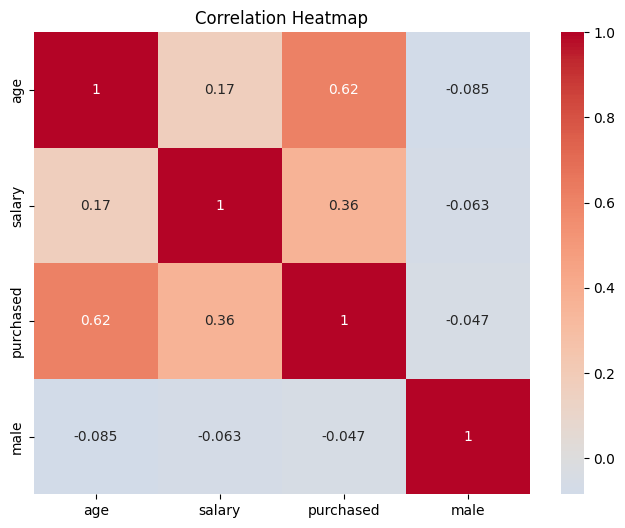

In [62]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
# Splitting the data into training and testing sets (80% train, 20% test) with a random seed for reproducibility and purchased as the target variable

# Features (everything except 'purchased')
X = data.drop(columns=['purchased'])

# Target variable
y = data['purchased']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1125)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       115
           1       0.84      0.81      0.83        85

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



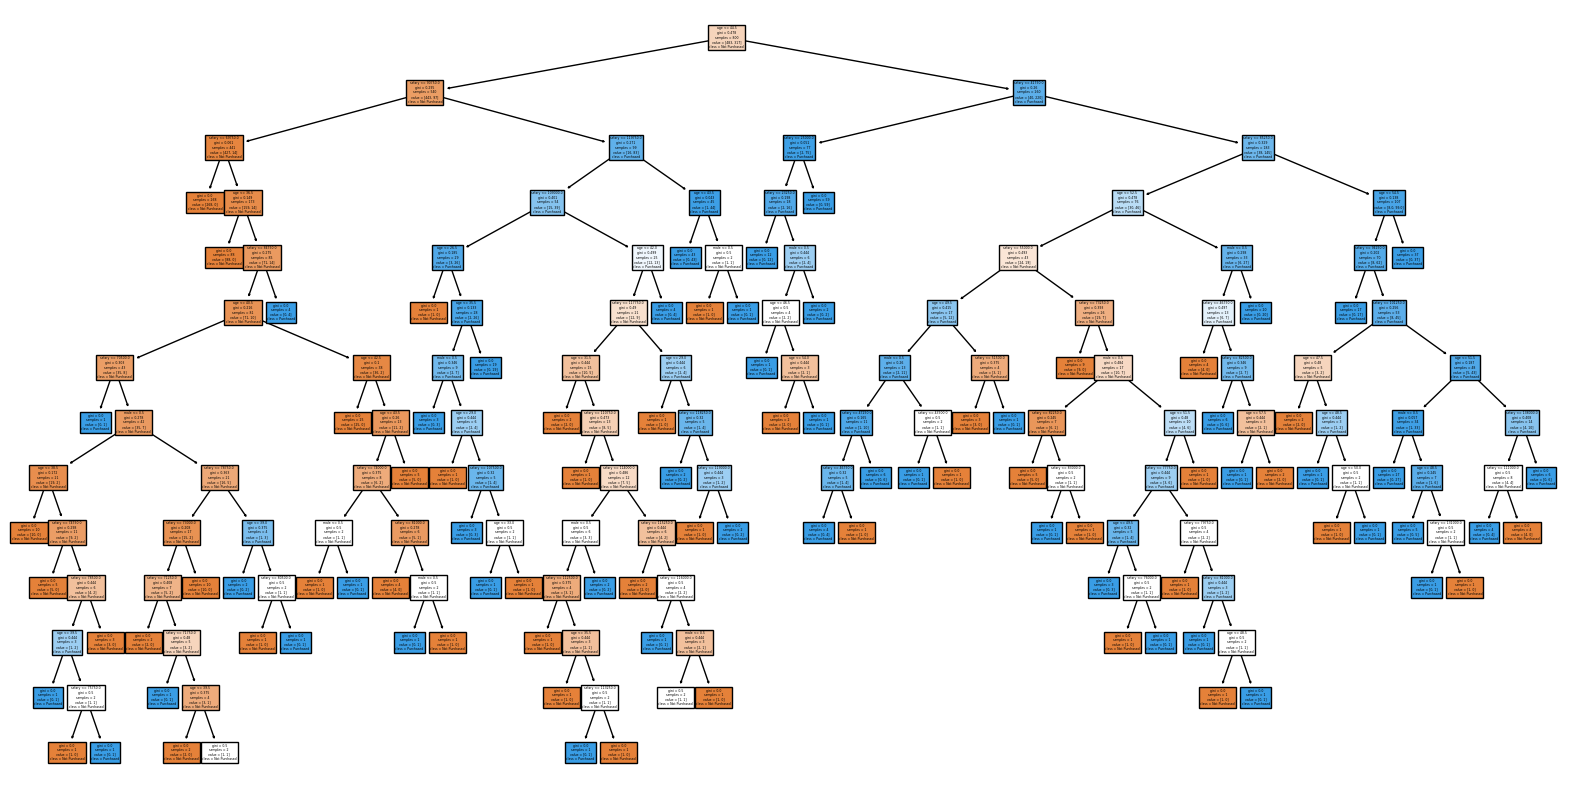

In [81]:
# Decision Tree Model
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=1125)

# Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Model Evaluation
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()

# Save the accuracy, F1 score and ROC AUC score for comparison
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_roc_auc = roc_auc_score(y_test, y_pred)

In [79]:


# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search_dt = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best ROC_AUC: ", grid_search_dt.best_score_)


Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best ROC_AUC:  0.9582263844782972


Best Decision Tree 1 Accuracy: 0.885


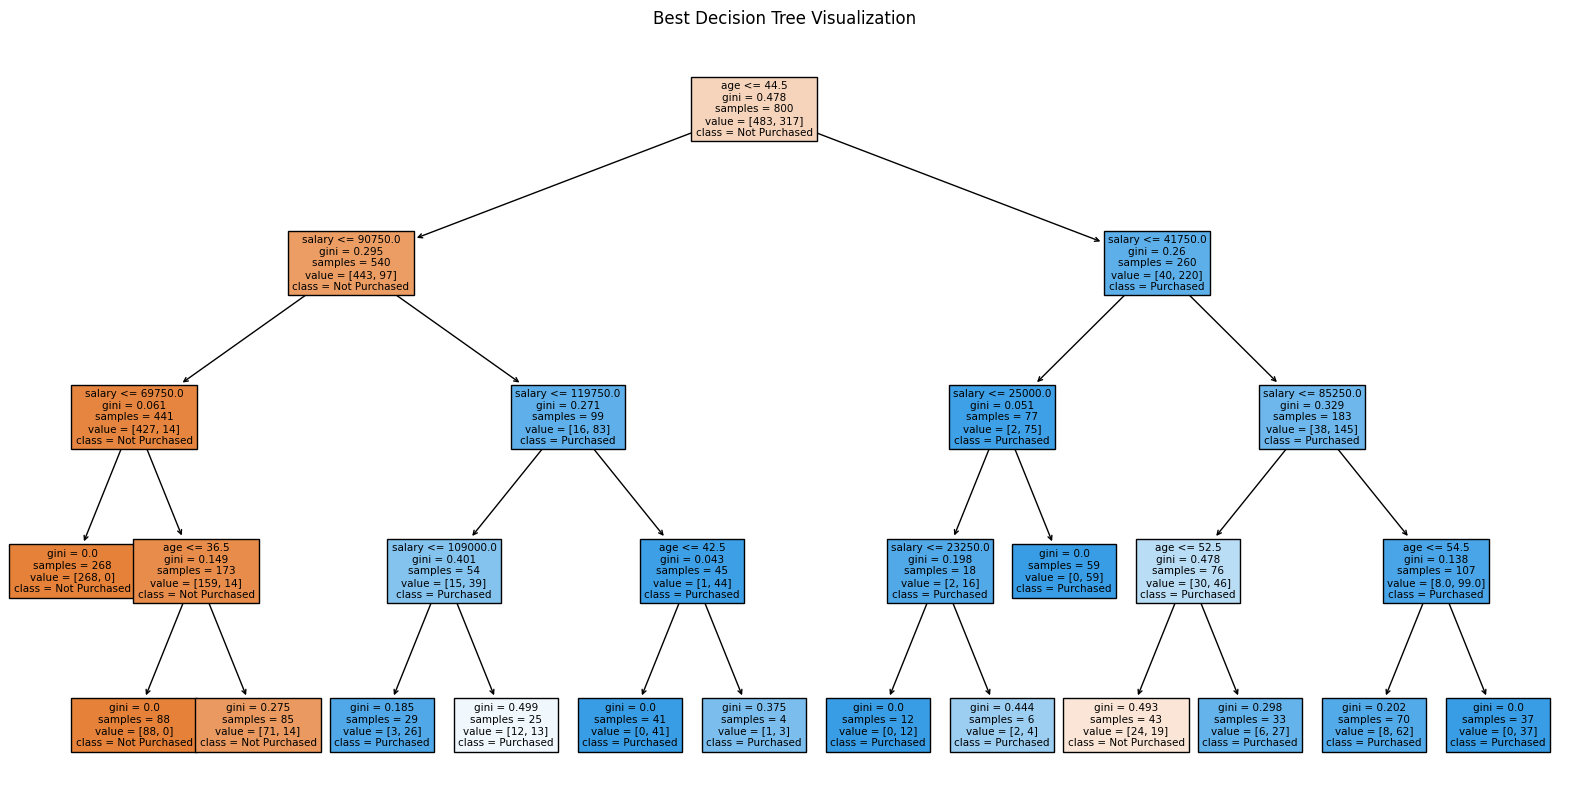

In [80]:
# Create Decision Tree with the best parameters from the grid search
best_dt1 = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=1125)
# Fit the model
best_dt1.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_best_dt1 = best_dt1.predict(X_test)

# Score the model
best_dt1_score = best_dt1.score(X_test, y_test)

print(f"Best Decision Tree 1 Accuracy: {best_dt1_score}")

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt1, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.title('Best Decision Tree Visualization')
plt.show()

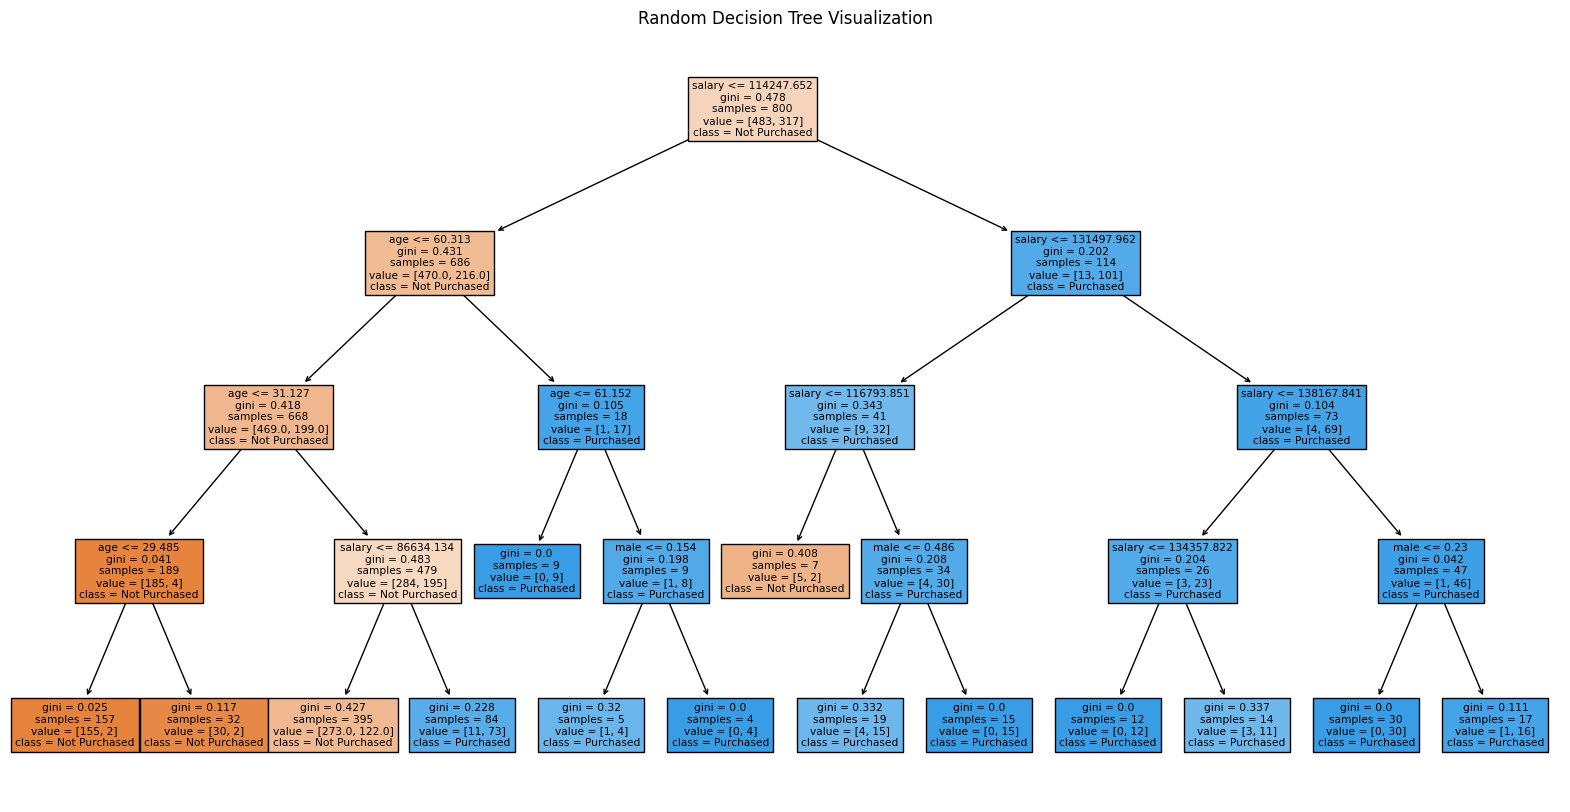

In [67]:
# Second decision tree with random splits
best_dt2 = DecisionTreeClassifier(**grid_search_dt.best_params_, splitter='random', random_state=42)
best_dt2.fit(X_train, y_train)

# Plot the random decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt2, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.title('Random Decision Tree Visualization')
plt.show()


In [82]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predictions for first decision tree
y_pred1 = best_dt1.predict(X_test)

# Predictions for second decision tree
y_pred2 = best_dt2.predict(X_test)

# Performance metrics for first decision tree
accuracy1 = accuracy_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)

# Performance metrics for second decision tree
accuracy2 = accuracy_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)

print("First Decision Tree:")
print(f"Accuracy: {accuracy1}, F1 Score: {f1_score1}, ROC AUC: {roc_auc1}")

print("Second Decision Tree:")
print(f"Accuracy: {accuracy2}, F1 Score: {f1_score2}, ROC AUC: {roc_auc2}")


First Decision Tree:
Accuracy: 0.885, F1 Score: 0.863905325443787, ROC AUC: 0.8815856777493607


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC_AUC:  0.9666764466740304
Best Random Forest Accuracy: 0.88


C:\Users\shaya\AppData\Local\Temp\ipykernel_48712\2813594955.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


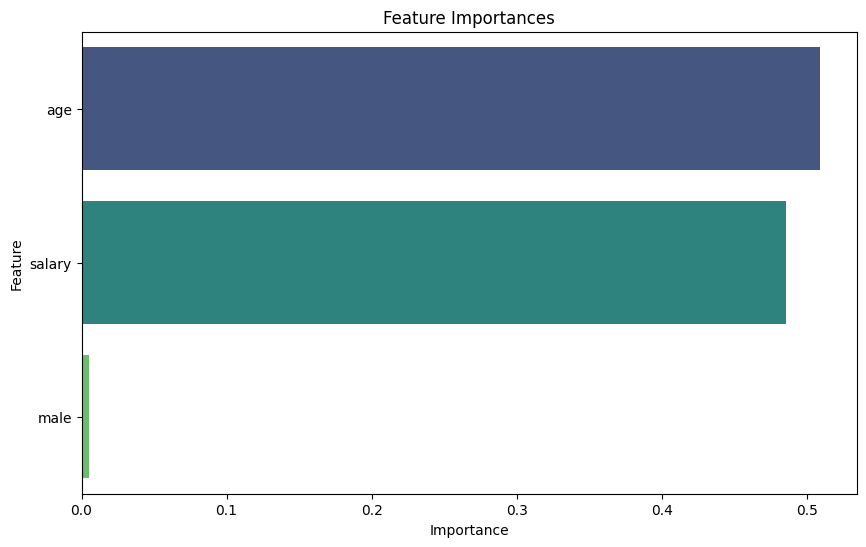

,Model,Accuracy,F1 Score,ROC AUC
0,Decision Tree Auto,0.855,0.826347,0.849361
1,Decision Tree 1,0.885,0.863905,0.881586
2,Decision Tree 2,0.760,0.652174,0.729923
3,Random Forest,0.880,0.863636,0.881841


In [69]:
# Random Forest
# Define the model
rf_model = RandomForestClassifier(random_state=1125)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best ROC_AUC: ", grid_search_rf.best_score_)
# Create Random Forest with the best parameters from the grid search
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=1125)
# Fit the model
best_rf.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_best_rf = best_rf.predict(X_test)

# Score the model
best_rf_score = best_rf.score(X_test, y_test)
f1_score_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Accuracy: {best_rf_score}")

# Feature Importance
# Get feature importances from the best random forest model

# Get feature importances
feature_importances = best_rf.feature_importances_


# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

# Create a dataframe to compare the performance of the two decision trees and the random forest
results = pd.DataFrame({
    'Model': ['Decision Tree Auto', 'Decision Tree 1', 'Decision Tree 2', 'Random Forest'],
    'Accuracy': [dt_accuracy, best_dt1_score, accuracy2, best_rf_score],
    'F1 Score': [dt_f1, f1_score1, f1_score2, f1_score_rf],
    'ROC AUC': [dt_roc_auc, roc_auc1, roc_auc2, roc_auc_rf]
})
    
results


In [70]:
# Print the feature importances for the best random forest model
#print("Feature Importances:")
#for feature, importance in zip(X.columns, best_rf.feature_importances_):
#    print(f"{feature}: {importance}")

# Save the feature importances for later
feature_importances = best_rf.feature_importances_

# Save the feature importances of the two decision trees as well
feature_importances_dt1 = best_dt1.feature_importances_
feature_importances_dt2 = best_dt2.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Decision Tree 1': feature_importances_dt1, 'Decision Tree 2': feature_importances_dt2, 'Random Forest': feature_importances})

feature_importance_df
    

,Feature,Decision Tree 1,Decision Tree 2,Random Forest
0,age,0.563571,0.325199,0.508721
1,salary,0.436429,0.668941,0.485824
2,male,0.000000,0.005860,0.005455


In [71]:
# Recreate the random forest without the above average salary and age features and compare the results
#X_no_above_avg = X.drop(columns=['above_avg_salary', 'above_avg_age'])

# Split the data into training and testing sets (80% train, 20% test)
#X_train_no_above_avg, X_test_no_above_avg, y_train, y_test = train_test_split(X_no_above_avg, y, test_size=0.2, random_state=1125)

# Define the model
#rf_model_no_above_avg = RandomForestClassifier(random_state=1125)

# Setup the grid search
#grid_search_rf_no_above_avg = GridSearchCV(estimator=rf_model_no_above_avg, param_grid=param_grid_rf, 
#                                           cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
#grid_search_rf_no_above_avg.fit(X_train_no_above_avg, y_train)

# Create Random Forest with the best parameters from the grid search
#best_rf_no_above_avg = RandomForestClassifier(**grid_search_rf_no_above_avg.best_params_, random_state=1125)
# Fit the model

#best_rf_no_above_avg.fit(X_train_no_above_avg, y_train)

# Predict the target variable on the test data
#y_pred_best_rf_no_above_avg = best_rf_no_above_avg.predict(X_test_no_above_avg)

# Score the model
#best_rf_no_above_avg_score = best_rf_no_above_avg.score(X_test_no_above_avg, y_test)
#f1_score_rf_no_above_avg = f1_score(y_test, y_pred_best_rf_no_above_avg)
#roc_auc_rf_no_above_avg = roc_auc_score(y_test, y_pred_best_rf_no_above_avg)

# Create a dataframe to compare the performance of the random forest with and without the above average salary and age features
#results_no_above_avg = pd.DataFrame({
#    'Model': ['Random Forest with Above Avg Features', 'Random Forest without Above Avg Features'],
#    'Accuracy': [best_rf_score, best_rf_no_above_avg_score],
#    'F1 Score': [f1_score_rf, f1_score_rf_no_above_avg],
#    'ROC AUC': [roc_auc_rf, roc_auc_rf_no_above_avg]
#})

#results_no_above_avg

In [72]:
# Compare the feature importances for the two random forest models
# Get feature importances
#feature_importances_no_above_avg = best_rf_no_above_avg.feature_importances_

# Create a DataFrame to display feature importance
#for feature, importance in zip(X_no_above_avg.columns, feature_importances_no_above_avg):
#    print(f"{feature}: {importance}")

Perform an analysis of the dataset used in Homework #2 using the SVM algorithm.
Compare the results with the results from previous homework.
Answer questions, such as:
Which algorithm is recommended to get more accurate results?
Is it better for classification or regression scenarios?
Do you agree with the recommendations?
Why?

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Resample the dataset
smote = SMOTE(random_state=1125)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize the resampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model with class weights
svm_model = SVC(random_state=1125, class_weight='balanced')

# Define a reduced parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Setup randomized search with fewer iterations and folds
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm, 
                                       n_iter=5, cv=3, scoring='roc_auc', n_jobs=-1, random_state=1125)

# Fit the randomized search to the scaled resampled data
random_search_svm.fit(X_train_scaled, y_resampled)

# Use the best model
best_svm = random_search_svm.best_estimator_

# Evaluate the model
best_svm.fit(X_train_scaled, y_resampled)
y_pred_svm = best_svm.predict(X_test_scaled)

# Scoring
accuracy_svm = best_svm.score(X_test_scaled, y_test)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print(f"Best SVM Accuracy: {accuracy_svm}")
print(f"Best F1 Score: {f1_svm}")
print(f"Best ROC AUC: {roc_auc_svm}")


Best SVM Accuracy: 0.84
Best F1 Score: 0.8181818181818182
Best ROC AUC: 0.840920716112532


In [88]:
# Print the best parameters and score
print("Best parameters found: ", random_search_svm.best_params_)

Best parameters found:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


In [45]:
# Decision Tree with class weights
dt_model = DecisionTreeClassifier(random_state=1125, class_weight='balanced')
dt_model.fit(X_train_scaled, y_resampled)
y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = dt_model.score(X_test_scaled, y_test)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")
print(f"Decision Tree ROC AUC: {roc_auc_dt}")

# Random Forest with class weights
rf_model = RandomForestClassifier(random_state=1125, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = rf_model.score(X_test_scaled, y_test)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest ROC AUC: {roc_auc_rf}")


Decision Tree Accuracy: 0.86
Decision Tree F1 Score: 0.8352941176470589
Decision Tree ROC AUC: 0.8567774936061382
Random Forest Accuracy: 0.86
Random Forest F1 Score: 0.8390804597701149
Random Forest ROC AUC: 0.8598465473145781


In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Resample the dataset
smote = SMOTE(random_state=1125)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize the resampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model with class weights
svm_model = SVC(random_state=1125, class_weight='balanced')

# Define a reduced parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Setup randomized search with fewer iterations and folds
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm, 
                                       n_iter=5, cv=3, scoring='roc_auc', n_jobs=-1, random_state=1125)

# Fit the randomized search to the scaled resampled data
random_search_svm.fit(X_train_scaled, y_resampled)

# Use the best model
best_svm = random_search_svm.best_estimator_

# Evaluate the model
best_svm.fit(X_train_scaled, y_resampled)
y_pred_svm = best_svm.predict(X_test_scaled)

# Scoring
accuracy_svm = best_svm.score(X_test_scaled, y_test)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print(f"Best SVM Accuracy: {accuracy_svm}")
print(f"Best F1 Score: {f1_svm}")
print(f"Best ROC AUC: {roc_auc_svm}")


Best SVM Accuracy: 0.84
Best F1 Score: 0.8181818181818182
Best ROC AUC: 0.840920716112532


In [73]:
# Rerun the above decision tree and random forest with class weights and create a comparison dataframe
# Decision Tree with class weights
dt_model = DecisionTreeClassifier(random_state=1125, class_weight='balanced')
dt_model.fit(X_train_scaled, y_resampled)
y_pred_dt = dt_model.predict(X_test_scaled)

# Random Forest with class weights
rf_model = RandomForestClassifier(random_state=1125, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Create a dataframe to compare the performance of the models
results_class_weights = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_svm, dt_model.score(X_test_scaled, y_test), rf_model.score(X_test_scaled, y_test)],
    'F1 Score': [f1_svm, f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)],
    'ROC AUC': [roc_auc_svm, roc_auc_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_rf)]
})

results_class_weights

,Model,Accuracy,F1 Score,ROC AUC
0,SVM,0.84,0.818182,0.840921
1,Decision Tree,0.86,0.835294,0.856777
2,Random Forest,0.86,0.839080,0.859847


In [83]:
#Recreate the decision tree and random forest models with class weights and using the best parameters found from their respective grid searches.
# Decision Tree with class weights and best parameters
best_dt_class_weights = DecisionTreeClassifier(**grid_search_dt.best_params_, class_weight='balanced', random_state=1125)
best_dt_class_weights.fit(X_train_scaled, y_resampled)
y_pred_best_dt_class_weights = best_dt_class_weights.predict(X_test_scaled)

# Random Forest with class weights and best parameters
best_rf_class_weights = RandomForestClassifier(**grid_search_rf.best_params_, class_weight='balanced', random_state=1125)
best_rf_class_weights.fit(X_train_scaled, y_resampled)
y_pred_best_rf_class_weights = best_rf_class_weights.predict(X_test_scaled)

# Create a dataframe to compare the performance of the models
results_best_class_weights = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [best_dt_class_weights.score(X_test_scaled, y_test), best_rf_class_weights.score(X_test_scaled, y_test), best_svm.score(X_test_scaled, y_test)],
    'F1 Score': [f1_score(y_test, y_pred_best_dt_class_weights), f1_score(y_test, y_pred_best_rf_class_weights), f1_svm],
    'ROC AUC': [roc_auc_score(y_test, y_pred_best_dt_class_weights), roc_auc_score(y_test, y_pred_best_rf_class_weights), roc_auc_svm]
})

results_best_class_weights

,Model,Accuracy,F1 Score,ROC AUC
0,Decision Tree,0.855,0.839779,0.860102
1,Random Forest,0.870,0.853933,0.873146
2,SVM,0.840,0.818182,0.840921


In the above code, we compared an SVM model with the prior models (Decision Tree and Random Forest). The results were very interesting. As a whole, SVM is generally recommended as a more accurate model for classification tasks, which this dataset is. However, in these analyses, the Decision Tree model and Random Forest model performed better than the SVM model in terms of accuracy, F1 score, and ROC AUC. 

This is not to say that SVM was not an accurate model, but rather that the Decision Tree and Random Forest models were more accurate in this particular scenario. The decision tree and, by extension, the random forest perfomed so well that they were able to outperform the SVM model. This is likely due to the nature of the dataset and its being a pretty straightforward classification problem with few features. In more complex scenarios, the SVM model may be more accurate.

Another factor that contributed to the decision tree and random forest models outperforming the SVM model was the imbalance in the dataset. Decision trees and random forests are able to handle imbalanced datasets better and were thus originally trained on the original dataset. The SVM model performed decently well on that data but was then trained on the resampled data, due to SVM being particularly sensitive to imbalanced datasets. The newer model did perform better than the original one did but still not as well as the decision tree and random forest models. Recreating the decision tree and random forest models with the class weights actually decreased their performance, which was unexpected, and narrowed the gap between them and the SVM model significantly. 

In [87]:
# See the actual svm model rules
# Get the support vectors
support_vectors = best_svm.support_vectors_

# Get the indices of the support vectors
support_vector_indices = best_svm.support_

# Get the number of support vectors for each class
support_vectors_per_class = best_svm.n_support_

# Get the coefficients of the support vector in the decision function
coefficients = best_svm.dual_coef_

# Get the intercepts
intercepts = best_svm.intercept_

# Get the classes
classes = best_svm.classes_

# Get the number of features
n_features = best_svm.n_features_in_

# Print the results
print("Support Vectors:")
print(support_vectors)
print("\nSupport Vector Indices:")
print(support_vector_indices)
print("\nSupport Vectors per Class:")
print(support_vectors_per_class)
print("\nCoefficients of Support Vectors:")
print(coefficients)
print("\nIntercepts:")
print(intercepts)
print("\nClasses:")
print(classes)

print("\nNumber of Features:")
print(n_features)


Support Vectors:
[[ 0.00984271 -0.45304957  1.14258009]
 [ 0.1039819   0.17351911 -0.87521217]
 [ 1.04537379  0.03730853  1.14258009]
 ...
 [ 0.57467785 -1.32545111  1.14258009]
 [ 0.29226028  0.93888638 -0.87521217]
 [ 0.85709541 -1.24307095  1.14258009]]

Support Vector Indices:
[  0   3   5  12  20  26  27  31  34  37  49  53  55  61  65  66  73  79
  87  89  90  92  95 101 110 111 119 121 122 123 124 125 126 129 134 136
 138 152 156 161 164 165 169 174 186 187 190 197 198 199 204 205 208 218
 236 237 245 246 252 253 258 263 265 267 270 280 281 284 288 291 304 306
 307 316 320 327 330 331 337 341 345 347 353 363 365 366 371 374 386 387
 394 396 402 403 404 406 410 415 416 417 419 420 422 432 433 436 437 438
 441 442 443 451 455 461 471 473 476 478 480 482 483 487 491 492 501 502
 503 505 506 513 521 522 526 535 537 548 551 553 554 557 558 563 575 577
 581 584 585 589 594 595 598 599 604 610 622 625 626 635 639 642 653 657
 659 661 664 667 669 673 681 682 687 690 691 699 702 704 718 